In [1]:
import os
import spacy

# Remember we need to initialise spaCy
nlp = spacy.load("en_core_web_sm")

import pandas as pd
from spacytextblob.spacytextblob import SpacyTextBlob

import matplotlib.pyplot as plt

# initialise spacy
nlp = spacy.load("en_core_web_sm")

spacy_text_blob = SpacyTextBlob()
nlp.add_pipe(spacy_text_blob)

In [2]:
data_path = os.path.join("abcnews-date-text.csv", )

In [14]:
# Defining the filepath were the data is going to be stored
df_path = os.path.join("sentiments")

In [4]:
data = pd.read_csv(data_path)

In [5]:
data.sample(20)

,publish_date,headline_text
608465,20110419,new authority to deal with trains buses and
432306,20081223,albany residents urged to be bushfire vigilant
905409,20140927,interview isaac smith
393052,20080626,lake currimundi study complete
1137432,20180811,nimbin fathers body believed to be found
115810,20040916,starcraft on track for nz success
682625,20120326,man dies after stabbing in craigieburn
739626,20121110,meares named australian cyclist of the year
467258,20090608,australia urged to help tuvaluan pirate hostages
552477,20100724,trafigura fined over toxic waste export


In [6]:
#Filtrate headline from the dataframe
Headlines= data["headline_text"]

In [7]:
#Define an empty list
polarity = []
subjectivity = []

In [8]:
%%time

# Create for loop that loops over all the headlines and calculates the sentiment
for doc in nlp.pipe(data["headline_text"], batch_size=10000):
    
    # For every sentence calculate sentiment by adding polarity and subjectivity
    for sentence in doc.sents:
        polarity_score = sentence._.sentiment.polarity
        subjectivity_score = sentence._.sentiment.subjectivity
        
        # Ad the scores to the lists
        polarity.append(polarity_score)
        subjectivity.append(subjectivity_score)

CPU times: user 45min 22s, sys: 6min 42s, total: 52min 5s
Wall time: 52min 6s


In [9]:
# Adding the two list, polarity and subjectivity, to coloumns in the data frame

# I could not add the lists directly, but when I convert them to series it works
polarity_values = pd.Series(polarity)

subjectivity_values = pd.Series(subjectivity)

#I use pandas insert feature where loc is set to 0 as it is at this position where I want the values to start
data.insert(loc=0, column="polarity", value=polarity_values)

data.insert(loc=0, column="subjectivity", value=subjectivity_values)

In [10]:
# Sentiment is (in this case) calculated by the sum of subjectivity and polarity

# I use the add. feature to sum the two columns polarity and subjectivity.
# In this case I use loc to to determine that it is the values that are in the same index position that are added together
data.loc[:, "sentiment"] = data.loc[:,"polarity"].add(data.loc[:,"subjectivity"])

In [15]:
# Save the updated data_df as a csv file
data.to_csv(df_path)

In [16]:
sentiment_df = pd.read_csv(df_path)

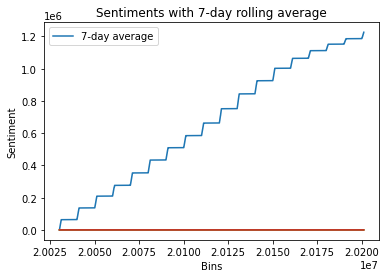

In [26]:
plt.plot(sentiment_df.groupby("publish_date").mean().rolling(7).mean())
#Add title
plt.title("Sentiments with 7-day rolling average")

#add xlabels
plt.xlabel("Bins")

#add ylabel
plt.ylabel("Sentiment")

plt.legend(['7-day average']);
plt.show()

In [1]:
plt.plot(sentiment_df.groupby("publish_date").mean().rolling(30).mean())
#Add title
plt.title("Sentiments with a month rolling average")

#add xlabels
plt.xlabel("??")

#add ylabel
plt.ylabel("Sentiment")

plt.legend(['a monthly average']);
plt.show()

NameError: name 'plt' is not defined

I have gotten an output that shows a trend of a sentiment score that increases and stagnates over eachother. I imagine something is completely wrong with my output because of this trend, but don't really know what.